In [3]:
library(tidyverse)
library(dplyr)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [4]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#88afd7",
    "Mean model 2"= "#d8dfa5",
    "Identity"="#E1C8AC")

In [5]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc_new_donor/single_condition"

In [6]:
df <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_new_donor.csv")
df <- df %>%
        filter(method == "cf") %>%
        filter(cytokine == "IFN-omega")

df$method <- factor(df$method, 
                                levels = c("id", "m1", "m2", "cf"),
                                labels = c("Identity", "Mean model 1", "Mean model 2", "CellFlow"))  # Correct factorization
df$num_cytokines_in_train <- as.character(df$num_cytokines_in_train)

df$num_cytokines_in_train <- factor(df$num_cytokines_in_train, 
                                    levels = sort(as.numeric(unique(df$num_cytokines_in_train))))



New names:
• `` -> `...1`
Rows: 9456 Columns: 179
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (10): ...1, Unnamed: 0, predicted_deg_genes, wandb_name, cytokine_in_t...
dbl  (167): mean_decoded_r_sq_per_cell_type, mean_e_distance_per_cell_type, ...
lgl    (1): new_run
dttm   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


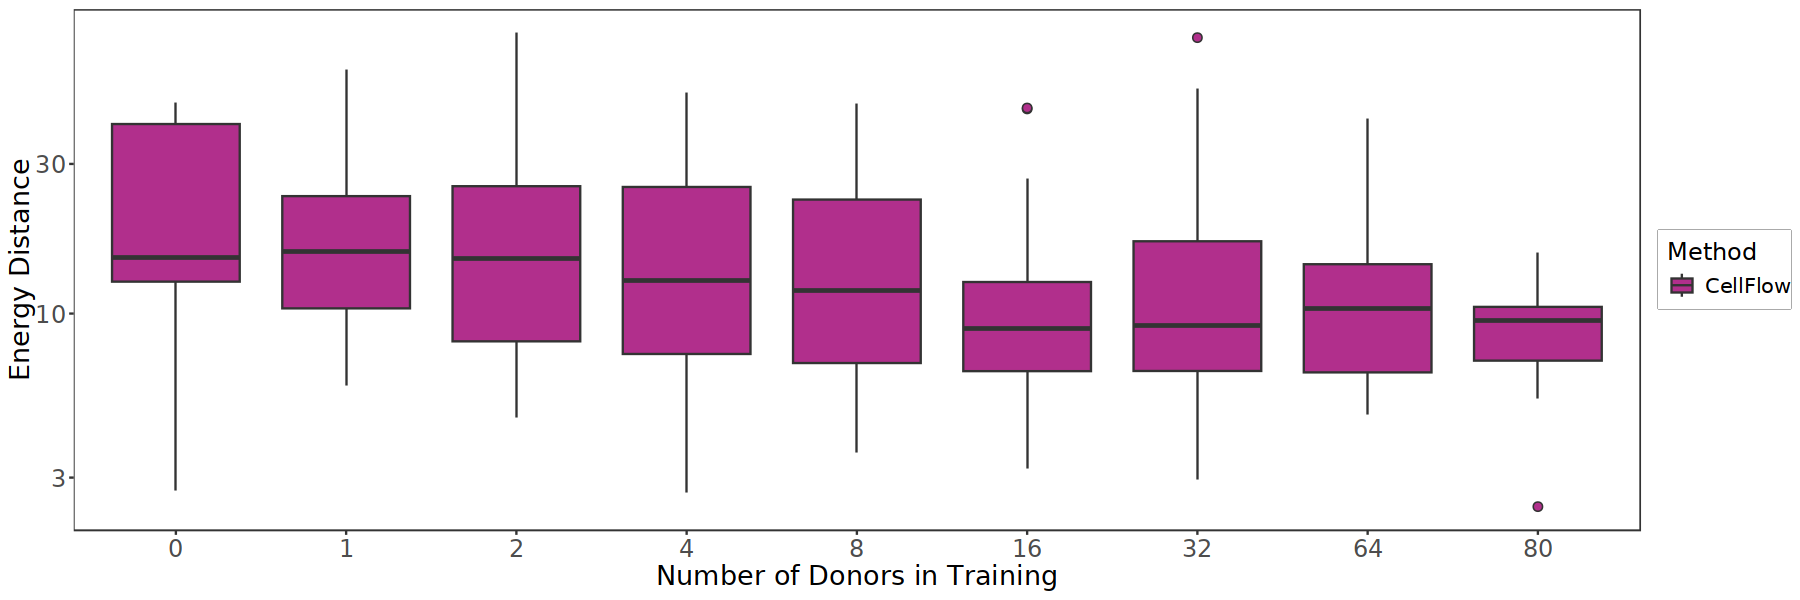

In [7]:
options(repr.plot.width = 15, repr.plot.height = 5)

# Create the boxplot
p <- ggplot(df, aes(x=as.factor(num_cytokines_in_train), y=ood_e_distance, fill=method)) +
  geom_boxplot(outlier.shape = 21, outlier.size = 2) +  # Add boxplot with custom outlier style
  labs(
    x="Number of Donors in Training",
    y="Energy Distance",
    fill="Method"
  ) +
  scale_y_log10() +  # Log scale for y-axis
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16),
    axis.title.y = element_text(size=16),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

p


In [8]:
ggsave(file.path(output_dir, "ifn_omega.pdf"), plot = p, device = "pdf",width = 15, height = 5)

In [9]:
df <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_new_donor.csv")
df <- df %>%
        filter(method == "cf") %>%
        filter(cytokine == "IL-32-beta")

df$method <- factor(df$method, 
                                levels = c("id", "m1", "m2", "cf"),
                                labels = c("Identity", "Mean model 1", "Mean model 2", "CellFlow"))  # Correct factorization
df$num_cytokines_in_train <- as.character(df$num_cytokines_in_train)

df$num_cytokines_in_train <- factor(df$num_cytokines_in_train, 
                                    levels = sort(as.numeric(unique(df$num_cytokines_in_train))))



New names:
• `` -> `...1`
Rows: 9456 Columns: 179
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (10): ...1, Unnamed: 0, predicted_deg_genes, wandb_name, cytokine_in_t...
dbl  (167): mean_decoded_r_sq_per_cell_type, mean_e_distance_per_cell_type, ...
lgl    (1): new_run
dttm   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


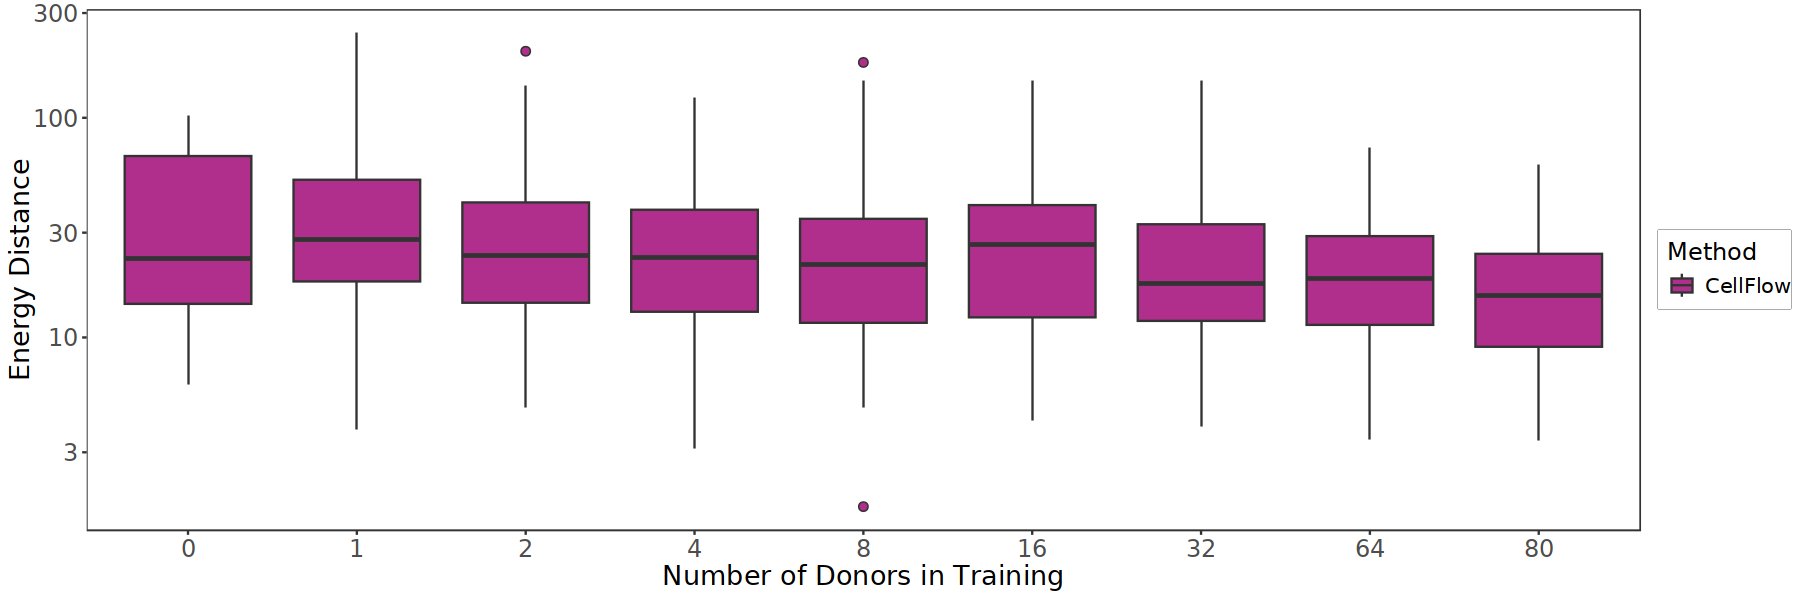

In [10]:
options(repr.plot.width = 15, repr.plot.height = 5)

# Create the boxplot
p <- ggplot(df, aes(x=as.factor(num_cytokines_in_train), y=ood_e_distance, fill=method)) +
  geom_boxplot(outlier.shape = 21, outlier.size = 2) +  # Add boxplot with custom outlier style
  labs(
    x="Number of Donors in Training",
    y="Energy Distance",
    fill="Method"
  ) +
  scale_y_log10() +  # Log scale for y-axis
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16),
    axis.title.y = element_text(size=16),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

p


In [11]:
ggsave(file.path(output_dir, "IL-32-beta.pdf"), plot = p, device = "pdf",width = 15, height = 5)